<a href="https://colab.research.google.com/github/abdulazizkomilov/Data-Science/blob/main/Aviachipta_Narxini_Bashorat_Qilish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np

#visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="whitegrid") 

#scikit-learn 
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# xgboost

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [99]:
df = pd.read_csv("/content/train_data.csv")

In [100]:
df_test = pd.read_csv("/content/test_data.csv")
sample_solution = pd.read_csv("/content/sample_solution.csv")

In [101]:
sample_solution.head()

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [102]:
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [103]:
df.dtypes

id                    int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

# `Checking for null values`

In [104]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
id,0,0.0
airline,0,0.0
flight,0,0.0
source_city,0,0.0
departure_time,0,0.0
stops,0,0.0
arrival_time,0,0.0
destination_city,0,0.0
class,0,0.0
duration,0,0.0


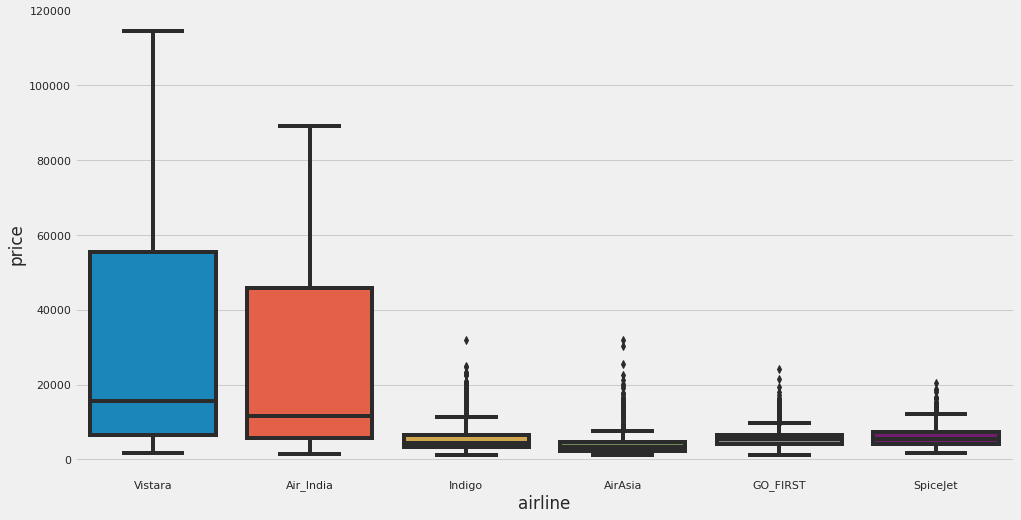

In [105]:
plt.figure(figsize=(15,8))
sns.boxplot(y='price',x='airline',data = df.sort_values('price',ascending=False))
plt.show()

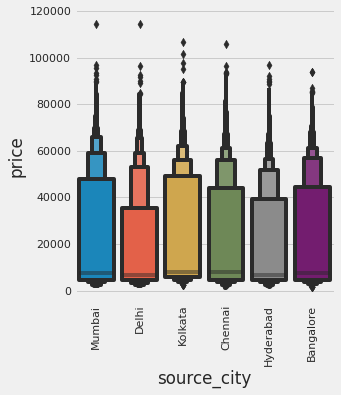

In [106]:
sns.catplot(y='price',x='source_city',data = df.sort_values('price',ascending=False),kind='boxen')
plt.xticks(rotation=90)
plt.show()

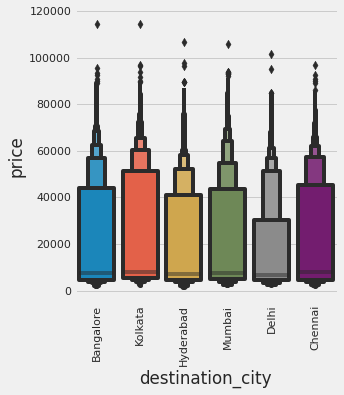

In [107]:
sns.catplot(y='price',x='destination_city',data = df.sort_values('price',ascending=False),kind='boxen')
plt.xticks(rotation=90)
plt.show()

In [108]:
df['flight'].apply(lambda x: x[:2]).value_counts()

UK    8535
AI    5371
6E    2924
G8    1508
I5    1056
SG     606
Name: flight, dtype: int64

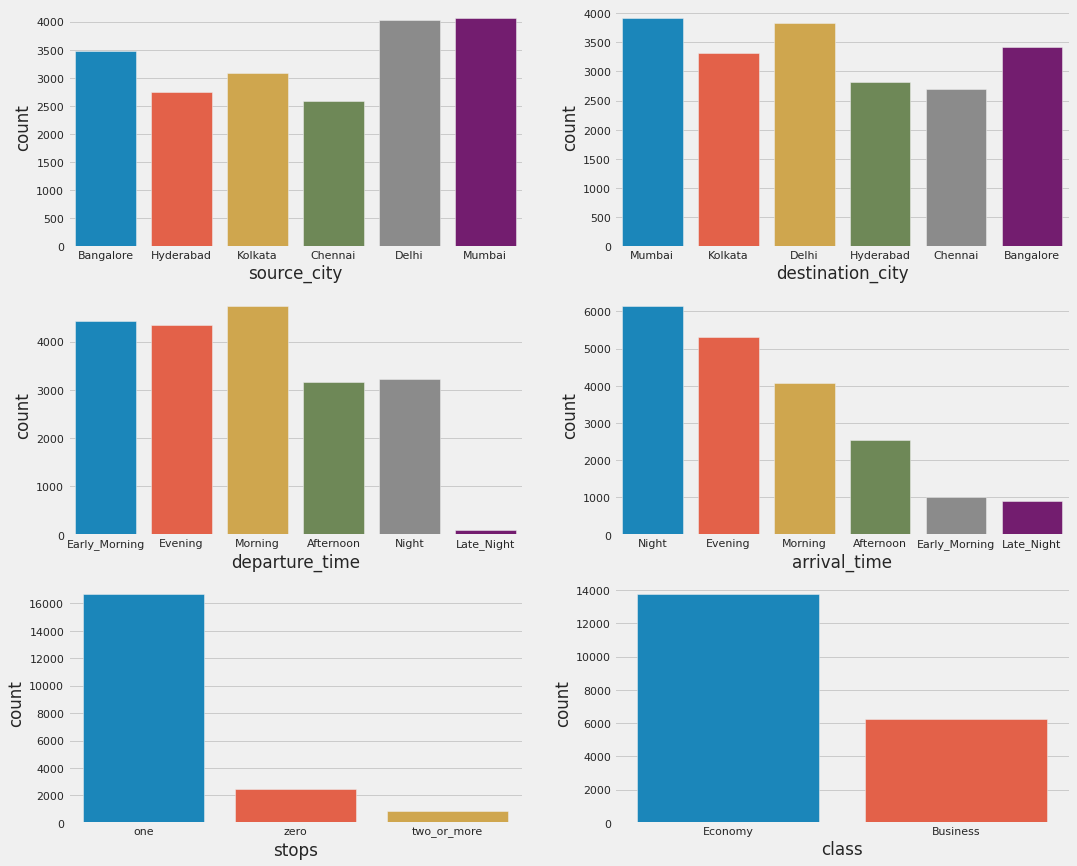

In [109]:
fig, ax = plt.subplots(3, 2, figsize=(16, 14))

sns.countplot(ax=ax[0, 0], data=df, x='source_city')
sns.countplot(ax=ax[0, 1], data=df, x='destination_city')
sns.countplot(ax=ax[1, 0], data=df, x='departure_time')
sns.countplot(ax=ax[1, 1], data=df, x='arrival_time')
sns.countplot(ax=ax[2, 0], data=df, x='stops')
sns.countplot(ax=ax[2, 1], data=df, x='class');

# **`Dealing with Outliers`**

Rejection 2 points


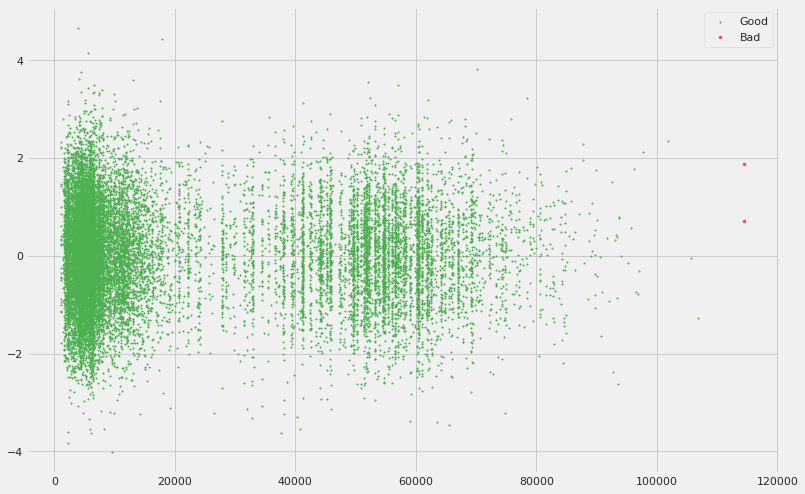

In [110]:
plt.figure(figsize=(12,8))
mean, std = np.mean(df['price']), np.std(df['price'])
z_score = np.abs((df['price'] - mean) / std)
threshold = 4
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
visual_scatter = np.random.normal(size=df['price'].size)
plt.scatter(df['price'][good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(df['price'][~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend();

In [111]:
df[df['price'] < 110000]

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,6E-6178,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19996,19997,AirAsia,I5-582,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19997,19998,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822
19998,19999,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,16.33,21,6450


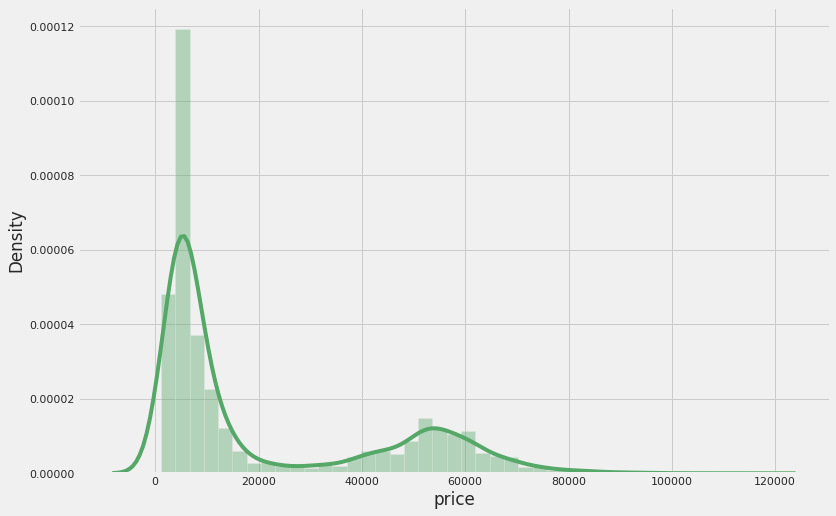

In [112]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'] ,color= "g")
plt.show()

In [113]:
for i in range(len(df)):
    if df['source_city'][i] == df['destination_city'][i]:
        print('Xatolik bor!')
df.drop(['id', 'flight'], axis=1, inplace=True)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,Vistara,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [114]:
split_df = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for tr_idx, te_idx in split_df.split(df, df['class']):
    st_trainset = df.loc[tr_idx]
    st_testset = df.loc[te_idx]

In [115]:
st_trainset.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
4188,Vistara,Kolkata,Evening,one,Morning,Bangalore,Economy,17.08,10,11853
9108,Air_India,Delhi,Afternoon,one,Morning,Mumbai,Business,19.08,8,53164
16660,GO_FIRST,Kolkata,Afternoon,zero,Afternoon,Mumbai,Economy,2.83,19,4499
242,Vistara,Delhi,Afternoon,zero,Evening,Kolkata,Economy,2.17,33,4000
2031,Vistara,Mumbai,Afternoon,one,Night,Hyderabad,Economy,10.50,29,3971


In [116]:
st_testset.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
5544,Vistara,Hyderabad,Afternoon,zero,Afternoon,Delhi,Economy,2.25,39,2200
11698,Air_India,Bangalore,Early_Morning,one,Early_Morning,Chennai,Economy,24.58,8,10744
11388,Vistara,Delhi,Early_Morning,one,Afternoon,Mumbai,Economy,7.00,27,5227
10218,Air_India,Chennai,Morning,one,Night,Mumbai,Business,12.25,23,49553
9697,Air_India,Chennai,Night,one,Morning,Kolkata,Economy,12.67,32,4784


In [127]:
X = st_trainset.drop('price', axis=1)
y = st_trainset['price'].copy()

X_num = X[['duration', 'days_left']]

In [128]:
num_pipeline = Pipeline([
            ('std_scaler', StandardScaler())
])

In [129]:
num_attribs = list(X_num)
cat_attribs = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

full_pipeline = ColumnTransformer([
              ('num', num_pipeline, num_attribs),
              ('cat', OneHotEncoder(), cat_attribs)
])

In [130]:
X_train = full_pipeline.fit_transform(X)
X_test = full_pipeline.transform(df_test)

In [133]:
def predict(ml_model):          
    model=ml_model.fit(X_train,y)
    print('Training score : {}'.format(model.score(X_train,y)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    submission = pd.DataFrame(y_prediction)
    submission['id'] = df_test['id']
    submission.rename({0:'price'},axis =1,inplace=True)
    submission = submission[['id','price']]
    submission.to_csv('submission.csv',index=False)

In [140]:
predict(GradientBoostingRegressor(alpha=.3 , n_estimators=320,learning_rate=0.9, max_depth=30))

Training score : 0.9999092104453361
predictions are: 
 [54810.00794598 60601.00000502 23483.99999999 ... 50271.
 45693.00000035 66062.99999999]




In [135]:
predict(KNeighborsClassifier())

Training score : 0.5437777777777778
predictions are: 
 [ 8104 41281 23484 ... 50271 50868 49207]




In [136]:
predict(XGBRegressor())

[11:48:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score : 0.9546510877746134
predictions are: 
 [57338.582 56550.516 24404.04  ... 54509.49  48904.168 60056.24 ]




In [137]:
predict(LinearRegression())

Training score : 0.9131069429377112
predictions are: 
 [55857.8844532  53695.1670034  40639.4986522  ... 51568.31172559
 48664.57308961 51835.41565534]




In [138]:
predict(DecisionTreeRegressor())

Training score : 0.9999092104453361
predictions are: 
 [54863. 60601. 23484. ... 50271. 45693. 66063.]




In [139]:
predict(RandomForestRegressor(n_estimators=100, criterion='squared_error', min_impurity_decrease=1, ccp_alpha=1))

Training score : 0.9961365253209147
predictions are: 
 [53216.18       57575.62       23413.78641608 ... 50271.
 48125.25       65530.13      ]




In [141]:
solution = pd.read_csv("/content/submission.csv")
solution.head()

,id,price
0,1,54810.007946
1,2,60601.000005
2,3,23484.000000
3,4,2228.000000
4,5,5103.087999


In [142]:
solution.shape

(5000, 2)